# Figure 3: Map colored by surface mass load

### 1. Load packages

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
# from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

# file containing functions:
import loadquakes
importlib.reload(loadquakes)
plt.style.use('fivethirtyeight')

### 2. Load datasets

In [20]:
# GRACE data
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
NND_declustered = pd.read_csv('NND_declustered.csv') # eta0 = 10
NND_declustered_v2 = pd.read_csv('NND_declustered_v2.csv') # eta0 = 10**3

### 3. Plot the SLIQs from the full catalog with highest CP

In [23]:
sliq_full=catalog.sort_values('cp',ascending=False)
sliq_full=sliq_full.reset_index()
sliq_full=sliq_full.drop(['index'], axis=1)

sliq_full['dmass']=sliq_full['dmass'].astype(float)

In [40]:
# Not used in the paper; need to reset the circle_scale variable with new function
# loadquakes.load_map_cb(catalog,sliq_full[sliq_full.cp>1.59],sliq_full[sliq_full.cp>1.59].dmass,
#                 'SLIQs with highest conditional probability (full catalog)',20,40,11,circle_scale=1e-6)
# plt.show()

### 4. Plot the SLIQs from the NND declustered catalog 

In [35]:
sliq_nnd=NND_declustered.sort_values('cp',ascending=False)
sliq_nnd=sliq_nnd.reset_index()
sliq_nnd=sliq_nnd.drop(['index'], axis=1)
sliq_nnd['dmass']=sliq_nnd['dmass'].astype(float)

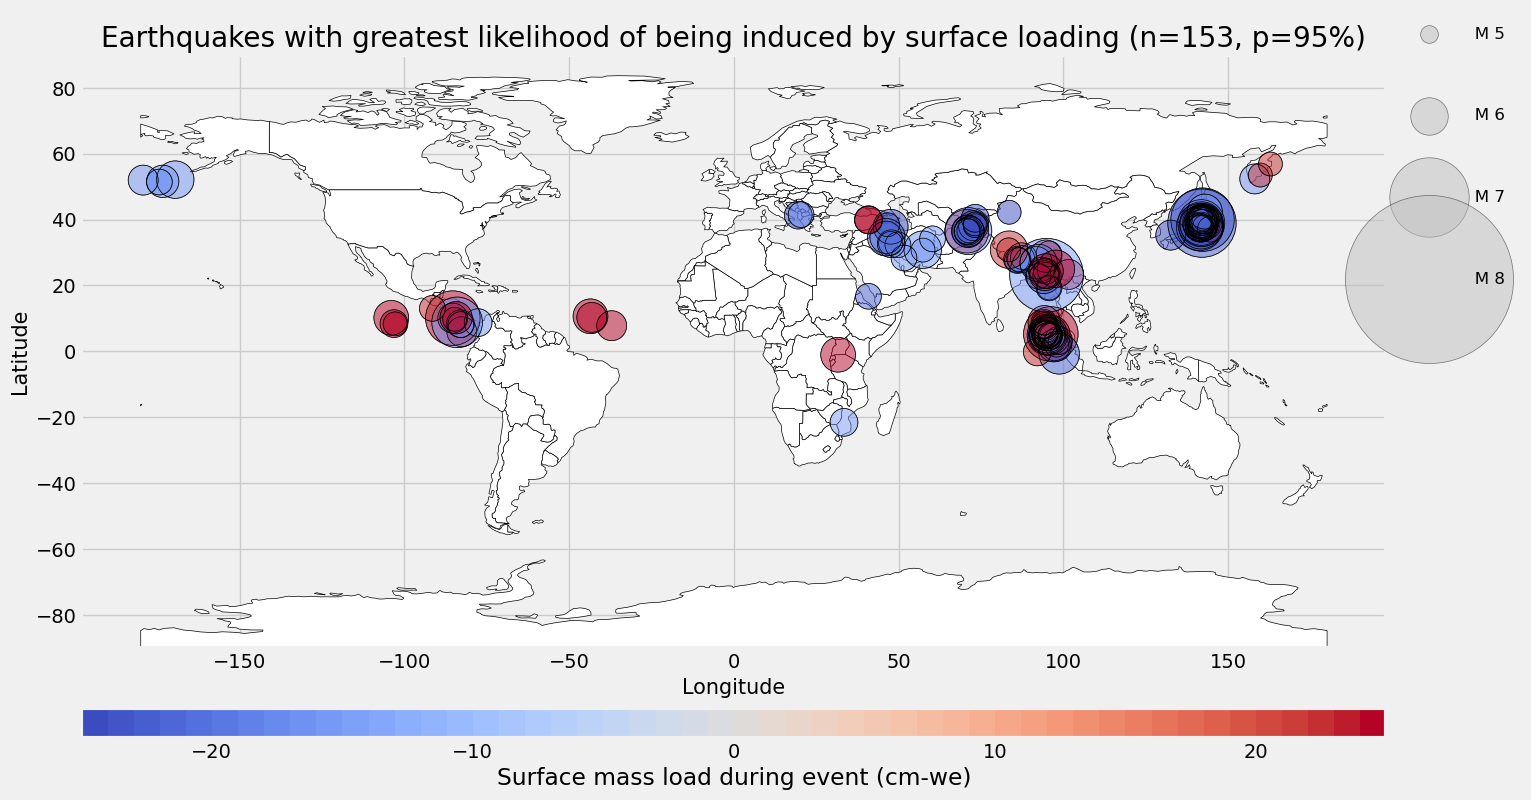

In [54]:
cp_thr = 1.5
nthr=len(sliq_nnd[sliq_nnd.cp>cp_thr])
loadquakes.load_map_cb(catalog,sliq_nnd[sliq_nnd.cp>cp_thr],sliq_nnd[sliq_nnd.cp>cp_thr].dmass,
                f'Earthquakes with greatest likelihood of being induced by surface loading (n={nthr}, p=95%)',
                       -25,25,circle_scale=0.09,markersize_scale=1.5)
plt.show()

### 5. Plot the SLIQs from the ETAS declustered catalog with highest CP

In [26]:
sliq_etas=etas_declustered.sort_values('cp',ascending=False)
sliq_etas=sliq_etas.reset_index()
sliq_etas=sliq_etas.drop(['index'], axis=1)
sliq_etas['dmass']=sliq_etas['dmass'].astype(float)
# sliq_etas.sort_values('dmass')

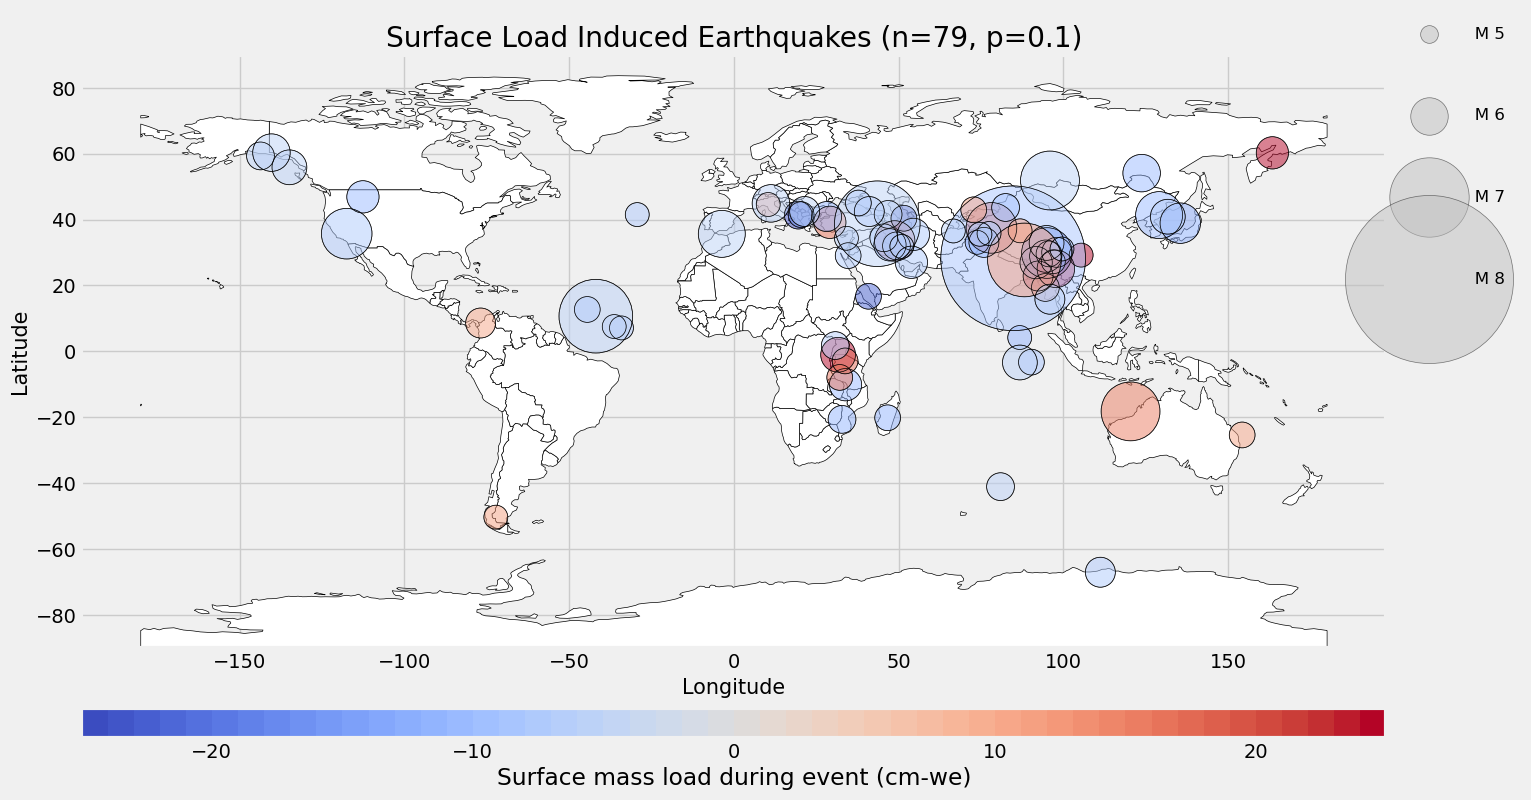

In [67]:
cp_thr = 1.5
nthr = len(sliq_etas[sliq_etas.cp>cp_thr])
sliq_etas_sig = sliq_etas[sliq_etas.cp>cp_thr]

loadquakes.load_map_cb(catalog,sliq_etas_sig,
                       sliq_etas_sig.dmass,
                f'Surface Load Induced Earthquakes (n={nthr}, p=0.1)',
                       -25,25,circle_scale=0.09,markersize_scale=1.5)
plt.show()

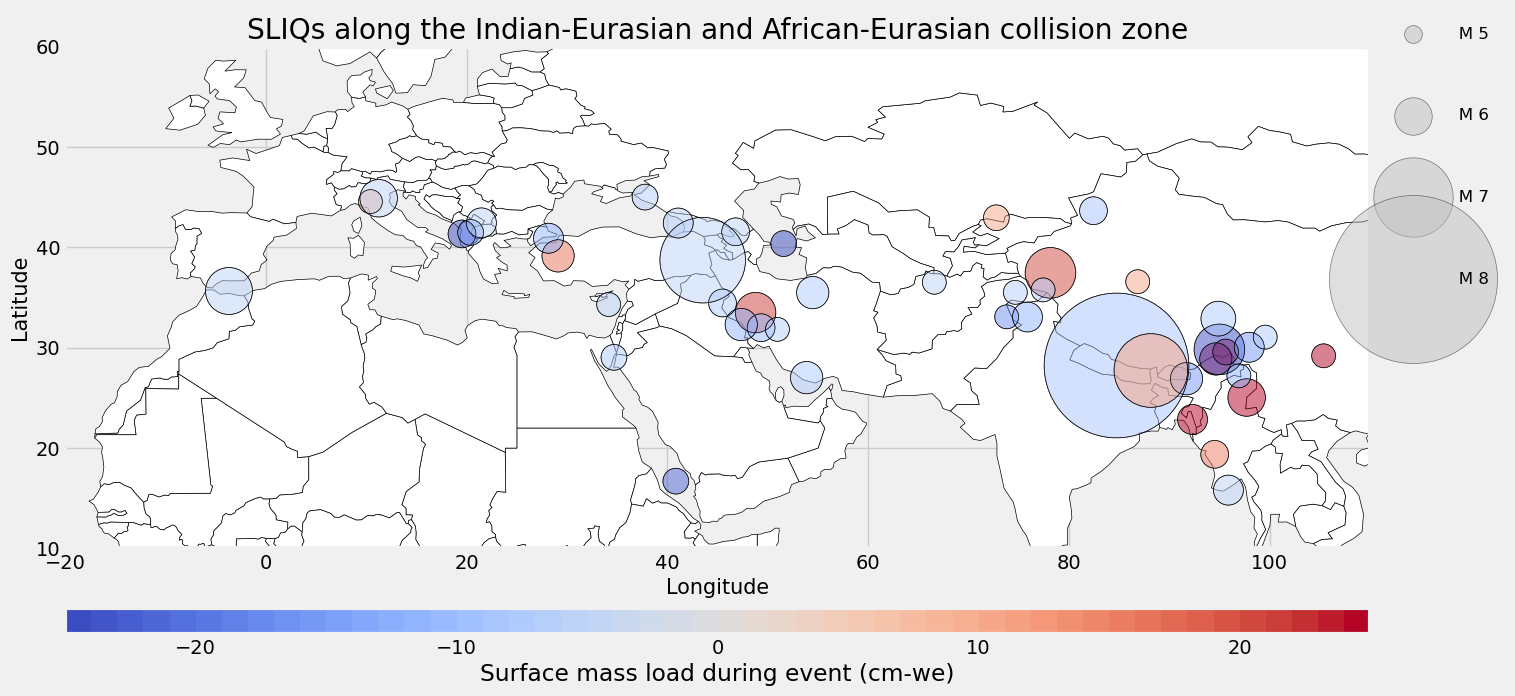

In [70]:
nyingchi=sliq_etas_sig[(sliq_etas_sig.latitude>10) & 
          (sliq_etas_sig.latitude<50) & 
          (sliq_etas_sig.longitude>-40) & 
          (sliq_etas_sig.longitude<110)]

ax=loadquakes.load_map_cb(catalog,nyingchi,nyingchi.dmass,
                'SLIQs along the Indian-Eurasian and African-Eurasian collision zone',
                          -25,25,circle_scale=0.09,markersize_scale=1.5)
ax.set_xlim([-20,110])
ax.set_ylim([10,60])
plt.show()

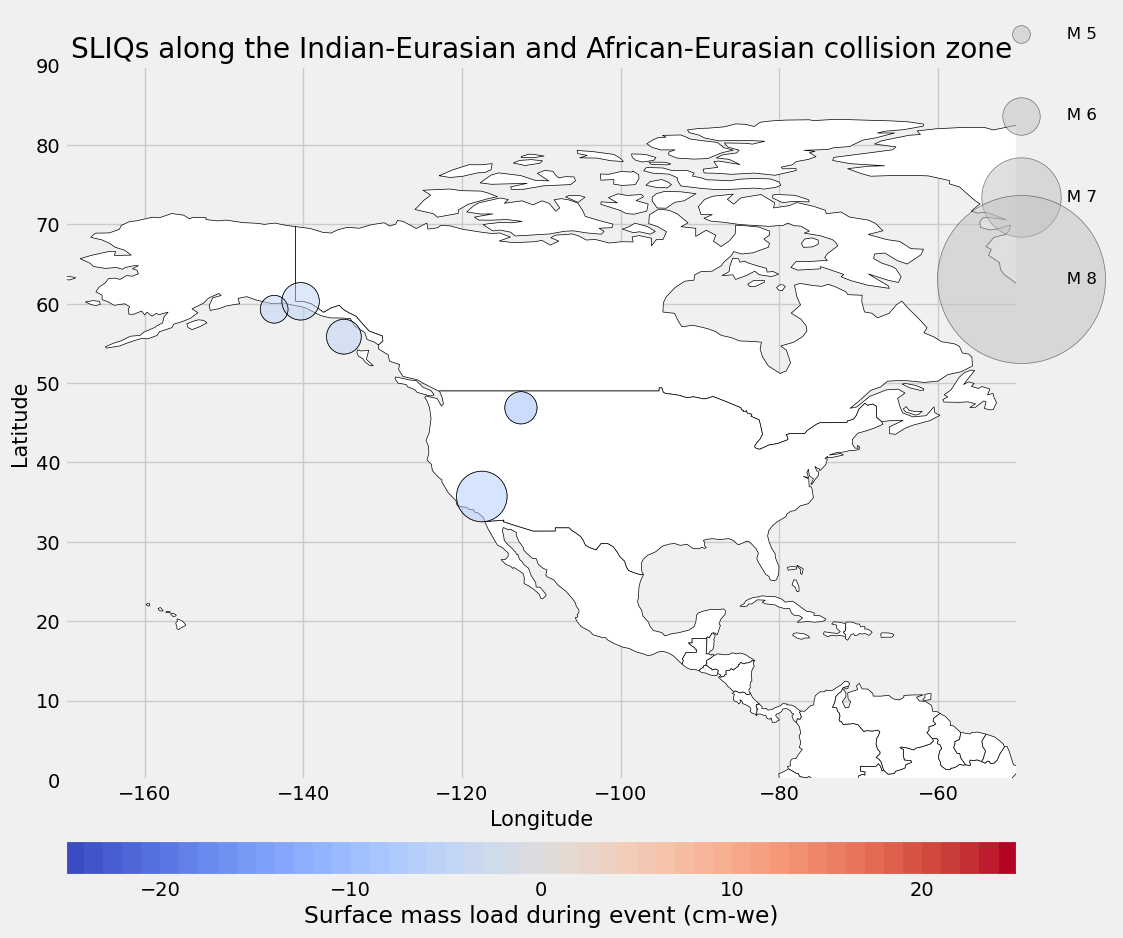

In [73]:
na=sliq_etas_sig[(sliq_etas_sig.latitude>10) & 
          (sliq_etas_sig.latitude<90) & 
          (sliq_etas_sig.longitude>-160) & 
          (sliq_etas_sig.longitude<-50)]

ax=loadquakes.load_map_cb(catalog,na,na.dmass,
                'SLIQs along the Indian-Eurasian and African-Eurasian collision zone',
                          -25,25,circle_scale=0.09,markersize_scale=1.5)
ax.set_xlim([-170,-50])
ax.set_ylim([0,90])
plt.show()

In [74]:
na

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
17,2683,2685,46.881100,-112.575300,2017-07-06 06:30:17.000,5.8,POINT (-112.57530 46.88110),5.4,0.0,6.907373e-11,0.179418,0.820582,1.0,12.18,-10.376436,2.354140
59,7778,7780,59.296100,-143.664600,2009-07-25 01:43:40.782,5.6,POINT (-143.66460 59.29610),5.4,0.0,6.907373e-11,0.664321,0.335679,1.0,10.20,-5.901404,1.591540
64,11892,11894,55.840400,-134.882700,2003-07-12 23:01:54.103,5.9,POINT (-134.88270 55.84040),5.4,0.0,6.907373e-11,0.599628,0.400372,1.0,10.00,-5.348480,1.591540
65,4333,4335,60.299500,-140.336600,2014-07-17 11:49:33.930,6.0,POINT (-140.33660 60.29950),5.4,0.0,6.907373e-11,0.853174,0.146826,1.0,10.00,-5.479621,1.591540
67,1530,1532,35.705333,-117.503833,2019-07-04 17:33:49.000,6.4,POINT (-117.50383 35.70533),5.4,0.0,6.907373e-11,0.573305,0.426695,1.0,10.50,-7.183867,1.535516


for discussion:
- biggest mag $\checkmark$
- biggest surface load $\checkmark$
- biggest cp $\checkmark$
- for ocean loading, mention wave activity + storm surges + transient oscillations in sea surface height + ocean bottom pressure
- how this ties into seismicity blurb $\checkmark$

main text figures:
- etas histogram $\checkmark$
- etas load map $\checkmark$

supplemental figs:
- 3x3 histogram $\checkmark$
- etas cp map $\checkmark$
- nnd load map $\checkmark$ (talk about how it doesn't work at our scale)
- xizang map $\checkmark$ *(double check the xizang map and extend it from euro collision belt)
- grace snapshots (also just for biggest and best!) $\checkmark$
- histogram for random data $\checkmark$
- histogram for events in the ocean and their load (all sliqs, then top 100 sliqs)

misc:

- for snapshots, look at pca snapshots with big loading + big cp $\checkmark$
- cite appropriate papers in overleaf (the one brad just sent in zulip (2/27) $\checkmark$
- some are associated with flexure! (land)
- MOR activity is correlated with unloading?
- most of the ocean events are on the equatorial MOR!
- discuss bigger context with supplemental figures -- describe state of global surafce mass field (regional context): Gorkha happenned during period of unloading (non-monsoon season) associated with the pre-monsoon phase of the hydrological cycle. (unseasonably early mass anomaly) - most events actually happen in the summer in Nepal.
--> consistent with Bollinger! 


- fix captions (add cp in caption)
- high probability (biggest load/unload?)
- patterns: basin, ocean current, regional pattern?
- 


In [78]:
np.mean(sliq_etas_sig.dmass)

-2.0623728522435374

In [79]:
np.median(sliq_etas_sig.dmass)

-6.4961061491471686

In [85]:
np.mean(np.array(ds.lwe_thickness).flatten())

-0.65387517841372

In [87]:
np.median(np.array(ds.lwe_thickness).flatten())

0.749170696239575

In [89]:
sum(sliq_etas_sig.dmass>0)

21